In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [2]:
FICHERO_RESEÑAS = '../GPT_transformer/data/df_para_clasificación.csv'

In [3]:
reviews = pd.read_csv(FICHERO_RESEÑAS)

In [4]:
reviews.head()

,reseñas,IA,longitud
0,Necesitaba un nuevo movil y me decidí por este...,0,297
1,Está en perfectas condiciones la batería al 10...,0,99
2,Me llegó ayer el iPhone en perfectas condicion...,0,436
3,Compré un iPhone 12 a este vendedor y hace un...,0,657
4,Soy usuario de IPhone desde el principio. Teng...,0,596


In [5]:
# Si queremos hacer un modelo supervisado necesitaremos sacar mas features

In [6]:
# Longitud promedio de las palabras
def obtener_longitud_promedio(reseña: str):
    palabras = word_tokenize(reseña.lower()) # Separamos el texto en palabras
    promedio = sum(len(word) for word in palabras) / len(palabras) # Hacemos el len de cada palabra de todas las palabras
    return promedio

reviews['longitud_promedio'] = reviews['reseñas'].apply(lambda x: obtener_longitud_promedio(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244


In [7]:
# Frecuencia de palabras únicas
def frecuencia_palabras_unicas(reseña: str):
    palabras = word_tokenize(reseña.lower()) 
    frecuencia = len(set(palabras)) / len(palabras)
    return frecuencia

reviews['palabras_unicas'] = reviews['reseñas'].apply(lambda x: frecuencia_palabras_unicas(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655


In [8]:
# Frecuencia de signos de puntuación
def frecuencia_signos_de_puntuacion(reseña: str):
    frecuencia = sum(1 for char in reseña if char in string.punctuation) # Si hay un signo de puntuación suma 1
    return frecuencia

reviews['signos_de_puntuación'] = reviews['reseñas'].apply(lambda x: frecuencia_signos_de_puntuacion(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11


In [9]:
# Frecuencia de pronombres
def frecuencia_pronombres(reseña: str):
    palabras = word_tokenize(reseña.lower()) 
    pronombres = ['yo', 'tú', 'él', 'ella', 'nosotros', 'vosotros', 'ellos', 'ellas', 'nosotras', 'vosotras']
    frecuencia = sum(1 for word in palabras if word in pronombres)
    return frecuencia

reviews['frecuencia_pronombres'] = reviews['reseñas'].apply(lambda x: frecuencia_pronombres(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0


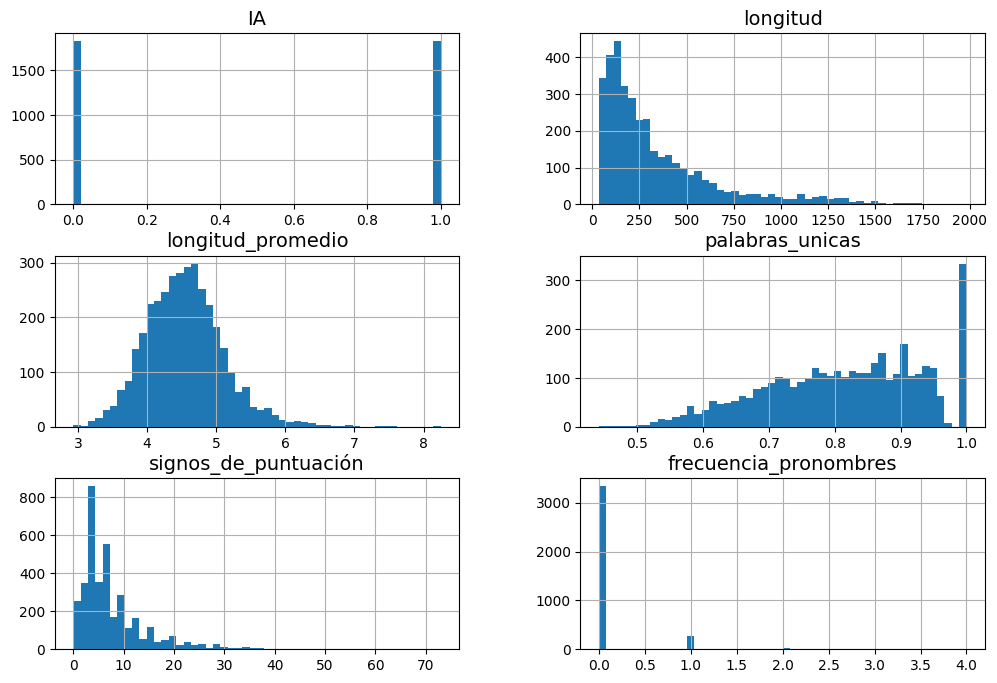

In [10]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

reviews.hist(bins=50, figsize=(12, 8))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [11]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ensembles"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [12]:
X = reviews.drop(columns=['reseñas', 'IA'])
y = reviews[['IA']]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [14]:
X_test

,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres
1406,59,3.000000,0.933333,0,0
3597,164,5.035714,0.857143,4,1
3645,82,6.083333,1.000000,2,0
3229,265,4.625000,0.875000,4,0
3113,60,5.200000,1.000000,1,0
...,...,...,...,...,...
343,46,5.714286,1.000000,0,0
1584,127,4.076923,0.884615,4,0
3450,182,5.064516,0.903226,6,0
678,251,4.078431,0.764706,7,0


In [15]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                  random_state=42, max_depth=2)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [16]:
from sklearn.tree import export_graphviz

export_graphviz(
        rnd_clf.estimators_[0],
        out_file=str(IMAGES_PATH / "example_tree.dot"),
        feature_names=["longitud", "longitud_promedio", "palabras_unicas", "signos_de_puntuación", "frecuencia_pronombres"],
        class_names=["Green", "Blue"],
        rounded=True,
        filled=True
    )

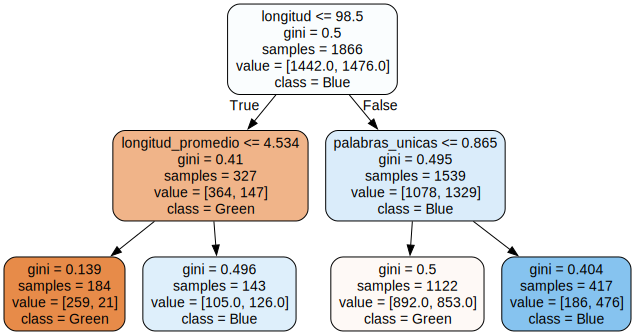

In [17]:
from graphviz import Source

Source.from_file(str(IMAGES_PATH/"example_tree.dot"))

In [18]:
# Calcular accuracy, precision, recall para el random forest
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_train, rnd_clf.predict(X_train)))
print(precision_score(y_train, rnd_clf.predict(X_train)))
print(recall_score(y_train, rnd_clf.predict(X_train)))

0.7940370116518163
0.7713583282114321
0.8456873315363881


In [19]:
# El recall indica que las reseñas escritas por una IA son correctamente identificadas por el modelo. 
# Es crucial en situaciones donde es más costoso perder positivos verdaderos (reseñas de IA no detectadas)

In [20]:
# Calcular accuracy, precision, recall para el cada árbol del random forest
a = []
p = []
r = []
for et in rnd_clf.estimators_:
    a.append(accuracy_score(y_train, et.predict(X_train)))
    p.append(precision_score(y_train, et.predict(X_train)))
    r.append(recall_score(y_train, et.predict(X_train)))

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without featur

In [21]:
print("Max accuracy", max(a))
print("Min accuracy", min(a))

Max accuracy 0.7906100068540096
Min accuracy 0.523989033584647


In [22]:
print("Max precision", max(p))
print("Min precision", min(p))

Max precision 0.7933284989122552
Min precision 0.5331613854089904


In [23]:
print("Max recall", max(r))
print("Min recall", min(r))

Max recall 0.9831536388140162
Min recall 0.12466307277628032


In [24]:
# como saber si es bueno, porque salen los mejores numeros posibles pero a costa de hacer un arbol gigante,
# porque esta intentando reducir el gini a 0 (esta overfitted)

In [25]:
# Vamos intentar buscar unos mejores hiperparámetros
rf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],       # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'], # Número de características a considerar en cada división
    'max_depth': [10, 20, 30, None],        # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],        # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]           # Número mínimo de muestras requeridas en un nodo hoja
}

In [26]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
539 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [27]:
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Predecir en los datos de prueba
y_pred_best = best_rf.predict(X_test)
y_pred_proba_best = best_rf.predict_proba(X_test)[:, 1]

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
classification_rep = classification_report(y_test, y_pred_best)

# Imprimir resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7863
Precision: 0.7408
Recall: 0.8324
F1 Score: 0.7839
ROC-AUC: 0.8577
Confusion Matrix:
[[291  99]
 [ 57 283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       390
           1       0.74      0.83      0.78       340

    accuracy                           0.79       730
   macro avg       0.79      0.79      0.79       730
weighted avg       0.79      0.79      0.79       730



In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Definir los hiperparámetros a buscar con distribuciones aleatorias
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': range(2,20),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda aleatoria con validación cruzada de 5 pliegues
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf_random = random_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best_random = best_rf_random.predict(X_test)
y_pred_proba_best_random = best_rf_random.predict_proba(X_test)[:, 1]

# Calcular métricas de evaluación
accuracy_random = accuracy_score(y_test, y_pred_best_random)
precision_random = precision_score(y_test, y_pred_best_random)
recall_random = recall_score(y_test, y_pred_best_random)
f1_random = f1_score(y_test, y_pred_best_random)
roc_auc_random = roc_auc_score(y_test, y_pred_proba_best_random)
conf_matrix_random = confusion_matrix(y_test, y_pred_best_random)
classification_rep_random = classification_report(y_test, y_pred_best_random)

# Imprimir resultados
print(f"Randomized Search - Accuracy: {accuracy_random:.4f}")
print(f"Randomized Search - Precision: {precision_random:.4f}")
print(f"Randomized Search - Recall: {recall_random:.4f}")
print(f"Randomized Search - F1 Score: {f1_random:.4f}")
print(f"Randomized Search - ROC-AUC: {roc_auc_random:.4f}")
print("Randomized Search - Confusion Matrix:")
print(conf_matrix_random)
print("Randomized Search - Classification Report:")
print(classification_rep_random)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
175 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
159 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Randomized Search - Accuracy: 0.7849
Randomized Search - Precision: 0.7389
Randomized Search - Recall: 0.8324
Randomized Search - F1 Score: 0.7828
Randomized Search - ROC-AUC: 0.8574
Randomized Search - Confusion Matrix:
[[290 100]
 [ 57 283]]
Randomized Search - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       390
           1       0.74      0.83      0.78       340

    accuracy                           0.78       730
   macro avg       0.79      0.79      0.78       730
weighted avg       0.79      0.78      0.79       730



In [30]:
# parece que no hemos encontrado gran mejora en la busqueda de nuevos hiperparámetros, enfoquemonos entonces en encontrar nuevos features

In [31]:
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0


In [32]:
# Vamos a añadir algunas caracteristicas de estilo
nltk.download('punkt')

def variedad_lexica(reseña: str):
    palabras = word_tokenize(reseña)
    palabras_unicas = set(palabras)
    frecuencia = len(palabras_unicas) / len(palabras)
    return frecuencia

reviews['variedad_lexica'] = reviews['reseñas'].apply(lambda x: variedad_lexica(x))
reviews.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pabma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462


In [33]:
# Al tener la proporcion de cantidad de palabras unicas entre palabras totales podriamos considerar eliminar las columnas de longitud y palabras unicas

In [34]:
# Entropia léxica, mide la incertidumbre en la eleccion de las palabras, usamos el calculo de la entropia de Shannon
import numpy as np
from collections import Counter

def entropia_lexica(reseña: str):
    palabras = word_tokenize(reseña)
    conteo_palabras = Counter(palabras)
    palabras_totales = len(palabras)
    probab = [count / palabras_totales for count in conteo_palabras.values()]
    entropia = -sum(p * np.log2(p) for p in probab)
    return entropia

reviews['entropia_lexica'] = reviews['reseñas'].apply(lambda x: entropia_lexica(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860


In [35]:
# Analisis del sentimiento
from textblob import TextBlob

def analisis_sentimiento(reseña):
    blob = TextBlob(reseña)
    polaridad = blob.sentiment.polarity
    subjetividad = blob.sentiment.subjectivity
    return polaridad, subjetividad

reviews['sentimiento'] = reviews['reseñas'].apply(lambda x: analisis_sentimiento(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,sentimiento
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,"(0.0, 0.0)"
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,"(0.0, 0.0)"
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,"(0.0, 0.0)"
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,"(0.0, 0.0)"
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,"(0.0, 0.0)"


In [36]:
reviews['sentimiento'].value_counts() # Parece que los resultados no concluyen en nada

sentimiento
(0.0, 0.0)                                   2809
(1.0, 1.0)                                    122
(0.9, 1.0)                                     41
(0.0, 0.75)                                    31
(0.375, 0.75)                                  28
                                             ... 
(-0.4000000000000001, 0.4666666666666666)       1
(-0.06875, 0.7875)                              1
(0.25, 1.0)                                     1
(-0.29296875, 0.75)                             1
(0.3125, 0.25)                                  1
Name: count, Length: 263, dtype: int64

In [37]:
reviews.drop(columns=['sentimiento'], inplace=True, errors='ignore')

In [38]:
# Uso de frases hechas y modismos
import re
expresiones_espanol_españa = [
    "Más vale tarde que nunca",
    "Matar dos pájaros de un tiro",
    "A buen entendedor, pocas palabras bastan",
    "Más vale prevenir que curar",
    "A caballo regalado no le mires el diente",
    "Cada loco con su tema",
    "A mal tiempo, buena cara",
    "Echar leña al fuego",
    "Camarón que se duerme, se lo lleva la corriente",
    "El que mucho abarca, poco aprieta",
    "El que ríe el último, ríe mejor",
    "Ojos que no ven, corazón que no siente",
    "Perro ladrador, poco mordedor",
    "Quien siembra vientos, recoge tempestades",
    "Zapatero, a tus zapatos"
]

def contar_frases_hechas(reseña, expresiones):
    regex = r'\b(?:{})\b'.format('|'.join(expresiones))
    return len(re.findall(regex, reseña.lower()))

reviews['expresiones'] = reviews['reseñas'].apply(lambda x: contar_frases_hechas(x, expresiones_espanol_españa))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,expresiones
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,0
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,0
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,0
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,0
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,0


In [39]:
reviews['expresiones'].value_counts() # no hay ninguna, eliminamos la columna

expresiones
0    3648
Name: count, dtype: int64

In [40]:
reviews.drop(columns=['expresiones_espanol_españa'], inplace=True, errors='ignore')

In [41]:
# Modelos de representación de texto

from sklearn.feature_extraction.text import TfidfVectorizer

def calcular_tfidf(reseña):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform([reseña])
    tfidf_values = X.toarray()[0]
    # Como al aplicar un modelo supervisado no podemos tener un diccionario en la columna, debemos buscar alguna operación que resuma,
    # los resultados del diccionario, el unico problema es que estas operaciones pueden ser sensibles al riudo, las operaciones mas interesantes son:
    # la suma, la media, la media ponderada y la desviación estándar, la mas interesante podría ser la desviación estándar ya que puede ser útil 
    # para entender la variabilidad en la importancia de los términos.
    desviacion_estandar = np.std(tfidf_values)
    return desviacion_estandar

reviews['tfidf'] = reviews['reseñas'].apply(lambda x: calcular_tfidf(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,expresiones,tfidf
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,0,5.640761e-02
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,0,5.551115e-17
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,0,5.749596e-02
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,0,7.866846e-02
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,0,7.357145e-02


In [42]:
# Características de complejidad linguistica
def contar_palabras_complejas(reseña: str):
    palabras_complejas = [palabra for palabra in reseña.split() if len(palabra) > 10]  # Ejemplo: palabras más largas
    return len(palabras_complejas)

def contar_palabras_tecnicas(reseña, tecnicismos):
    tecnicas_count = {termino: reseña.lower().count(termino) for termino in tecnicismos}
    cantidad_tecnicismos = sum(1 for count in tecnicas_count.values() if count > 0)

    return cantidad_tecnicismos

In [43]:
tecnicismos_resenas_productos = [
    "Calidad",
    "Desempeño",
    "Durabilidad",
    "Fiabilidad",
    "Ergonomía",
    "Usabilidad",
    "Estética",
    "Innovación",
    "Funcionalidad",
    "Eficiencia",
    "Confiabilidad",
    "Costo-beneficio",
    "Accesibilidad",
    "Portabilidad",
    "Adaptabilidad",
    "Mantenimiento",
    "Seguridad",
    "Sostenibilidad",
    "Comodidad",
    "Resistencia",
    "Potencia",
    "Precisión",
    "Versatilidad",
    "Robustez",
    "Autonomía",
    "Interfaz",
    "Actualización",
    "Intuitividad",
    "Compatibilidad",
    "Personalización",
    "Diseño",
    "Acabado",
    "Capacidad",
    "Performance",
    "Retroalimentación",
    "Eficiencia_energética",
    "Consumo",
    "Temperatura",
    "Rendimiento_térmico",
    "Velocidad",
    "Tiempo_de_respuesta",
    "Consumo_de_recursos",
    "Manejabilidad",
    "Adherencia",
    "Impermeabilidad",
    "Capacidad_de_carga",
    "Duración",
    "Estabilidad",
    "Resistencia_al_desgaste",
    "Facilidad_de_instalación",
    "Compatibilidad_con_sistemas",
    "Reducción_de_ruido",
    "Eco-amigable",
    "Tamaño",
    "Peso",
    "Facilidad_de_uso",
    "Insonorización",
    "Antibacteriano",
    "Antideslizante",
    "Resistencia_a_la_corrosión",
    "Resistencia_a_la_tracción",
    "Facilidad_de_limpieza",
    "Tecnología",
    "Innovación",
    "Eficiencia_energética",
    "Innovación",
    "Compatibilidad",
    "Precisión",
    "Estabilidad",
    "Fiabilidad",
    "Interfaz_de_usuario",
    "Ergonomía",
    "Capacidad_de_carga",
    "Integración",
    "Durabilidad",
    "Resistencia_al_agua",
    "Seguridad_al_usuario",
    "Eficiencia_en_el_uso_de_energía",
    "Fácil_mantenimiento",
    "Sostenibilidad_ambiental",
    "Resistencia_al_impacto",
    "Comodidad_de_uso",
    "Estabilidad_de_conexión",
    "Funcionalidad_multimedia",
    "Desempeño_en_condiciones_extremas",
    "Facilidad_de_ensamblaje",
    "Optimización_de_espacio",
    "Compatibilidad_de_formatos",
    "Protección_de_datos",
    "Facilidad_de_configuración",
    "Control_de_energía",
    "Compatibilidad_de_sistemas",
    "Escalabilidad",
    "Interoperabilidad",
    "Capacidad_de_expansión",
    "Facilidad_de_gestión",
    "Capacidad_de_procesamiento",
    "Conectividad",
    "Eficiencia_operativa",
    "Fiabilidad_de_datos",
    "Reciclabilidad",
    "Resistencia_al_fuego",
    "Calibración",
    "Funcionalidad_remota",
    "Estabilidad_de_software",
    "Compatibilidad_de_protocolos",
    "Innovación_tecnológica",
    "Estrategia_de_mercado",
    "Gestión_de_inventario",
    "Optimización_de_costos",
    "Adaptación_al_usuario",
    "Procesamiento_de_datos",
    "Análisis_de_datos",
    "Interacción_usuario-máquina",
    "Estabilidad_de_red",
    "Optimización_de_rendimiento",
    "Seguridad_de_la_información",
    "Cumplimiento_de_normativas",
    "Ajuste_personalizado",
    "Control_de_calidad"
]
for indice, tecnicismo in enumerate(tecnicismos_resenas_productos):
    tecnicismos_resenas_productos[indice] = tecnicismo.replace("_", " ")

In [44]:
reviews['palabras_complejas'] = reviews['reseñas'].apply(lambda x: contar_palabras_complejas(x))
reviews['tecnicismos'] = reviews['reseñas'].apply(lambda x: contar_palabras_tecnicas(x, tecnicismos_resenas_productos))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,expresiones,tfidf,palabras_complejas,tecnicismos
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,0,5.640761e-02,3,0
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,0,5.551115e-17,2,0
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,0,5.749596e-02,5,0
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,0,7.866846e-02,5,0
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,0,7.357145e-02,4,0


In [45]:
# Probemos el modelo ahora y con los nuevos hiperparametros

In [46]:
X = reviews.drop(columns=['reseñas', 'IA'])
y = reviews[['IA']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [48]:
best_rf_random.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [49]:
rnd_clf_1 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, max_features='log2', 
                                  min_samples_leaf=4, min_samples_split=10,
                                  random_state=42, max_depth=15)
rnd_clf_1.fit(X_train, y_train)
y_pred_rf_1 = rnd_clf_1.predict(X_test)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [50]:
features_names_list = list(X.columns.values)

In [51]:
features_names_list

['longitud',
 'longitud_promedio',
 'palabras_unicas',
 'signos_de_puntuación',
 'frecuencia_pronombres',
 'variedad_lexica',
 'entropia_lexica',
 'expresiones',
 'tfidf',
 'palabras_complejas',
 'tecnicismos']

In [52]:
rnd_clf_1.feature_names_in_

array(['longitud', 'longitud_promedio', 'palabras_unicas',
       'signos_de_puntuación', 'frecuencia_pronombres', 'variedad_lexica',
       'entropia_lexica', 'expresiones', 'tfidf', 'palabras_complejas',
       'tecnicismos'], dtype=object)

In [53]:
export_graphviz(
        rnd_clf_1.estimators_[0],
        out_file=str(IMAGES_PATH / "example_tree.dot"),
        feature_names=features_names_list,
        class_names=["Green", "Blue"],
        rounded=True,
        filled=True
    )

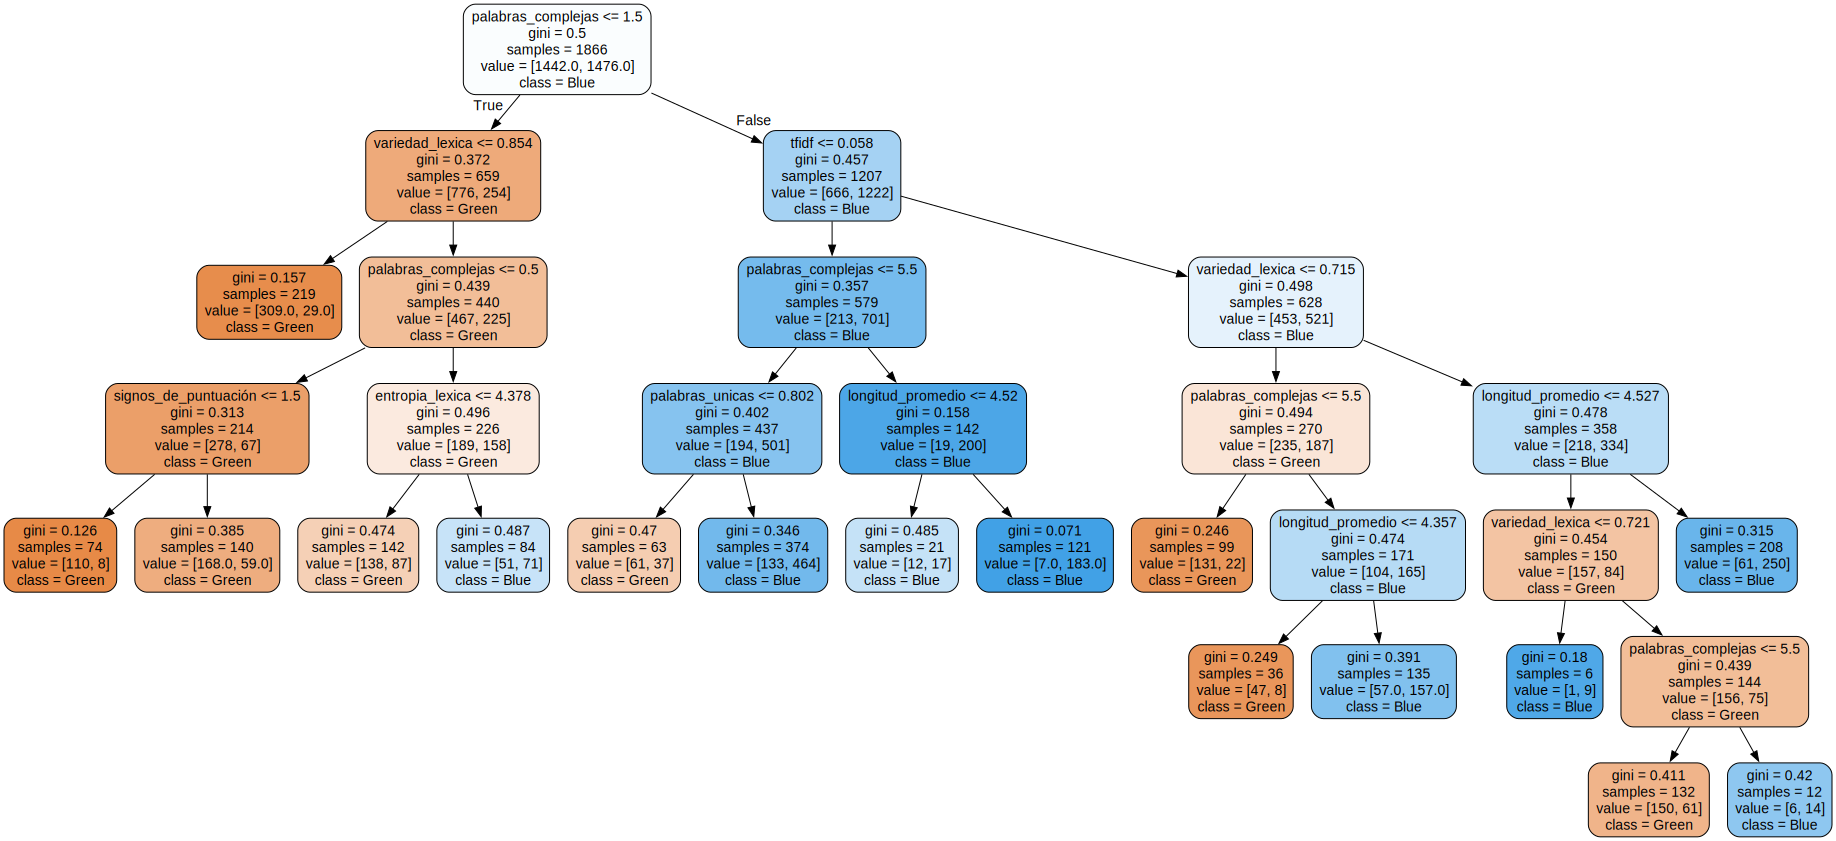

In [54]:
Source.from_file(str(IMAGES_PATH/"example_tree.dot"))

In [55]:
# Predecir en los datos de prueba
y_pred_best = rnd_clf_1.predict(X_test)
y_pred_proba_best = rnd_clf_1.predict_proba(X_test)[:, 1]

# Calcular métricas de evaluación
accuracy_1 = accuracy_score(y_test, y_pred_best)
precision_1 = precision_score(y_test, y_pred_best)
recall_1 = recall_score(y_test, y_pred_best)
f1_1 = f1_score(y_test, y_pred_best)
roc_auc_1 = roc_auc_score(y_test, y_pred_proba_best)
conf_matrix_1 = confusion_matrix(y_test, y_pred_best)
classification_rep_1 = classification_report(y_test, y_pred_best)

# Imprimir resultados
print(f"Accuracy: {accuracy_1:.4f}")
print(f"Precision: {precision_1:.4f}")
print(f"Recall: {recall_1:.4f}")
print(f"F1 Score: {f1_1:.4f}")
print(f"ROC-AUC: {roc_auc_1:.4f}")
print("Confusion Matrix:")
print(conf_matrix_1)
print("Classification Report:")
print(classification_rep_1)

Accuracy: 0.7808
Precision: 0.7419
Recall: 0.8118
F1 Score: 0.7753
ROC-AUC: 0.8548
Confusion Matrix:
[[294  96]
 [ 64 276]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       390
           1       0.74      0.81      0.78       340

    accuracy                           0.78       730
   macro avg       0.78      0.78      0.78       730
weighted avg       0.78      0.78      0.78       730



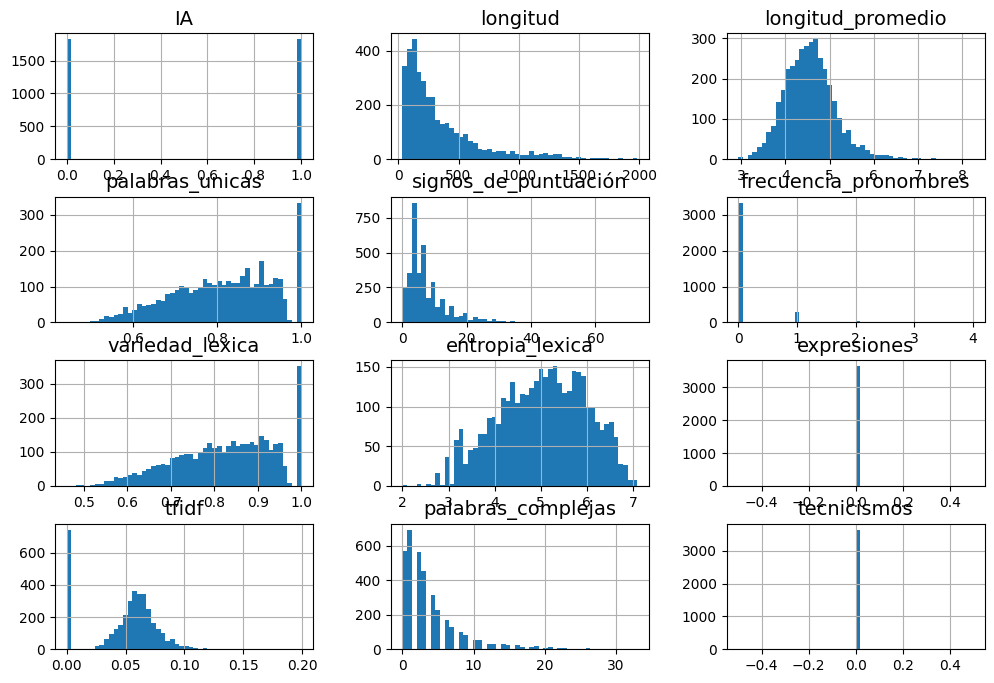

In [56]:
# Parece que no ha cambiado demasiado, quitemos algunas columnas.
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

reviews.hist(bins=50, figsize=(12, 8))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [57]:
# Parece que no ha cambiado demasiado, quitemos algunas columnas, hagamos una funcion.
def obtener_bosque(X, y): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, max_features='log2', 
                                  min_samples_leaf=4, min_samples_split=10,
                                  random_state=42, max_depth=15)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    roc_auc = roc_auc_score(y_test, y_pred_rf)
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    classification_rep = classification_report(y_test, y_pred_rf)

    # Imprimir resultados
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    return rnd_clf

In [58]:
X = reviews.drop(columns=['reseñas', 'IA', 'frecuencia_pronombres', 'expresiones', 'tecnicismos'])
y = reviews[['IA']]

obtener_bosque(X, y)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7753
Precision: 0.7391
Recall: 0.8000
F1 Score: 0.7684
ROC-AUC: 0.7769
Confusion Matrix:
[[294  96]
 [ 68 272]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       390
           1       0.74      0.80      0.77       340

    accuracy                           0.78       730
   macro avg       0.78      0.78      0.78       730
weighted avg       0.78      0.78      0.78       730



RandomForestClassifier(max_depth=15, max_features='log2', max_leaf_nodes=16,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [59]:
# Este parece ligeramente mejor, eso nos da una idea que nuestras columnas realmente importan
X = reviews.drop(columns=['reseñas', 'IA'])
y = reviews[['IA']]

obtener_bosque(X, y)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7808
Precision: 0.7419
Recall: 0.8118
F1 Score: 0.7753
ROC-AUC: 0.7828
Confusion Matrix:
[[294  96]
 [ 64 276]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       390
           1       0.74      0.81      0.78       340

    accuracy                           0.78       730
   macro avg       0.78      0.78      0.78       730
weighted avg       0.78      0.78      0.78       730



RandomForestClassifier(max_depth=15, max_features='log2', max_leaf_nodes=16,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [60]:
X.columns

Index(['longitud', 'longitud_promedio', 'palabras_unicas',
       'signos_de_puntuación', 'frecuencia_pronombres', 'variedad_lexica',
       'entropia_lexica', 'expresiones', 'tfidf', 'palabras_complejas',
       'tecnicismos'],
      dtype='object')

In [61]:
# Vamos a darle una vueltecita a nuevas columnas, empezamos con analisis de sentimiento
from textblob import TextBlob

def calcular_polaridad(reseña: str):
    blob = TextBlob(reseña)
    return blob.sentiment.polarity

def calcular_subjetividad(reseña: str):
    blob = TextBlob(reseña)
    return blob.sentiment.subjectivity

reviews['polaridad'] = reviews['reseñas'].apply(lambda x: calcular_polaridad(x))
reviews['subjetividad'] = reviews['reseñas'].apply(lambda x: calcular_subjetividad(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,expresiones,tfidf,palabras_complejas,tecnicismos,polaridad,subjetividad
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,0,5.640761e-02,3,0,0.0,0.0
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,0,5.551115e-17,2,0,0.0,0.0
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,0,5.749596e-02,5,0,0.0,0.0
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,0,7.866846e-02,5,0,0.0,0.0
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,0,7.357145e-02,4,0,0.0,0.0


In [62]:
# Caracteristicas de cohesion y coherencia

nltk.download('stopwords')
nltk.download('punkt')

def calcular_coherencia_tematica(reseña: str):
    stop_words = set(stopwords.words('spanish')) # Esto proporciona una lista de palabras muy comunes en el español que no sirven para lo que queremos analizar
    words = word_tokenize(reseña.lower())
    palabras_filtradas = [word for word in words if word.isalnum() and word not in stop_words]
    text = nltk.Text(palabras_filtradas)
    cohesion = len(set(text)) / len(text)
    return cohesion # Valores mas altos indican una mayor coherencia temática

reviews['coherencia'] = reviews['reseñas'].apply(lambda x: calcular_coherencia_tematica(x))
reviews.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pabma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pabma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,expresiones,tfidf,palabras_complejas,tecnicismos,polaridad,subjetividad,coherencia
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,0,5.640761e-02,3,0,0.0,0.0,0.920000
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,0,5.551115e-17,2,0,0.0,0.0,1.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,0,5.749596e-02,5,0,0.0,0.0,0.857143
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,0,7.866846e-02,5,0,0.0,0.0,0.823529
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,0,7.357145e-02,4,0,0.0,0.0,0.953488


In [63]:
# # Embeding de palabras (promedio), parece que no puedo instalar gensim
# from gensim.models import Word2Vec

# tokens = pd.DataFrame()
# tokens['tokens'] = reviews['reseñas'].apply(lambda x: word_tokenize(x.lower()))

# # Suponiendo que tienes un modelo Word2Vec previamente entrenado
# # En este ejemplo, se utilizará un modelo de ejemplo con datos sintéticos

# # Entrenar un modelo Word2Vec simple
# model = Word2Vec(tokens['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# def calcular_embedding_promedio(texto, model):
#     words = word_tokenize(texto.lower())
#     embeddings = []
#     for word in words:
#         if word in model.wv:
#             embeddings.append(model.wv[word])
#     if embeddings:
#         mean_embedding = np.mean(embeddings, axis=0)
#     else:
#         mean_embedding = np.zeros(model.vector_size)
#     return mean_embedding

# reviews['embedding_promedio'] = tokens['tokens'].apply(lambda x: calcular_embedding_promedio(x, model))



In [64]:
# este código ilustra cómo usar gensim para entrenar un modelo Word2Vec simple con datos sintéticos y 
# luego calcular embeddings promedio para un texto específico. Los embeddings resultantes pueden ser 
# utilizados como características en modelos de aprendizaje automático para tareas como clasificación de texto,
#  análisis de sentimientos, entre otras aplicaciones de procesamiento de lenguaje natural.

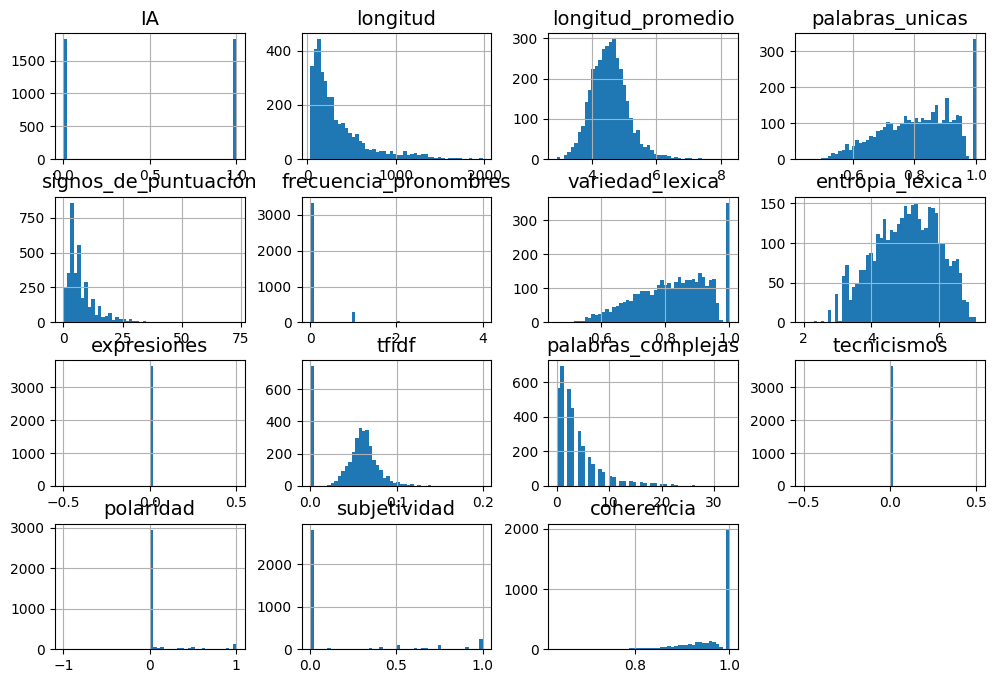

In [65]:
# Parece que no ha cambiado demasiado, quitemos algunas columnas.
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

reviews.hist(bins=50, figsize=(12, 8))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [66]:
X = reviews.drop(columns=['reseñas', 'IA'])
y = reviews[['IA']]

obtener_bosque(X, y)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7890
Precision: 0.7500
Recall: 0.8206
F1 Score: 0.7837
ROC-AUC: 0.7911
Confusion Matrix:
[[297  93]
 [ 61 279]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       390
           1       0.75      0.82      0.78       340

    accuracy                           0.79       730
   macro avg       0.79      0.79      0.79       730
weighted avg       0.79      0.79      0.79       730



RandomForestClassifier(max_depth=15, max_features='log2', max_leaf_nodes=16,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [67]:
X = reviews.drop(columns=['reseñas', 'IA', 'polaridad', 'coherencia', 'subjetividad'])
y = reviews[['IA']]

obtener_bosque(X, y)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7808
Precision: 0.7419
Recall: 0.8118
F1 Score: 0.7753
ROC-AUC: 0.7828
Confusion Matrix:
[[294  96]
 [ 64 276]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       390
           1       0.74      0.81      0.78       340

    accuracy                           0.78       730
   macro avg       0.78      0.78      0.78       730
weighted avg       0.78      0.78      0.78       730



RandomForestClassifier(max_depth=15, max_features='log2', max_leaf_nodes=16,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [68]:
X = reviews.drop(columns=['reseñas', 'IA', 'frecuencia_pronombres', 'expresiones', 'tecnicismos', 'polaridad', 'coherencia', 'subjetividad'])
y = reviews[['IA']]

obtener_bosque(X, y)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7753
Precision: 0.7391
Recall: 0.8000
F1 Score: 0.7684
ROC-AUC: 0.7769
Confusion Matrix:
[[294  96]
 [ 68 272]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       390
           1       0.74      0.80      0.77       340

    accuracy                           0.78       730
   macro avg       0.78      0.78      0.78       730
weighted avg       0.78      0.78      0.78       730



RandomForestClassifier(max_depth=15, max_features='log2', max_leaf_nodes=16,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [69]:
X = reviews.drop(columns=['reseñas', 'IA', 'frecuencia_pronombres', 'expresiones', 'tecnicismos'])
y = reviews[['IA']]

obtener_bosque(X, y)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7904
Precision: 0.7534
Recall: 0.8176
F1 Score: 0.7842
ROC-AUC: 0.7922
Confusion Matrix:
[[299  91]
 [ 62 278]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       390
           1       0.75      0.82      0.78       340

    accuracy                           0.79       730
   macro avg       0.79      0.79      0.79       730
weighted avg       0.79      0.79      0.79       730



RandomForestClassifier(max_depth=15, max_features='log2', max_leaf_nodes=16,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [70]:
# Como observamos no cambia practicamente nada, siendo el mejor el que mantiene todas las columnas, pero la diferencia entre columnas es muy baja,
# podemos concluir que es dificil mejorar el modelo,

In [71]:
# Nos quedamos con este
X = reviews.drop(columns=['reseñas', 'IA'])
y = reviews[['IA']]
nombres_features = list(X.columns.values)

modelo_final = obtener_bosque(X, y)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7890
Precision: 0.7500
Recall: 0.8206
F1 Score: 0.7837
ROC-AUC: 0.7911
Confusion Matrix:
[[297  93]
 [ 61 279]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       390
           1       0.75      0.82      0.78       340

    accuracy                           0.79       730
   macro avg       0.79      0.79      0.79       730
weighted avg       0.79      0.79      0.79       730



In [72]:
export_graphviz(
        modelo_final.estimators_[0],
        out_file=str(IMAGES_PATH / "example_tree.dot"),
        feature_names=nombres_features,
        class_names=["Green", "Blue"],
        rounded=True,
        filled=True
    )

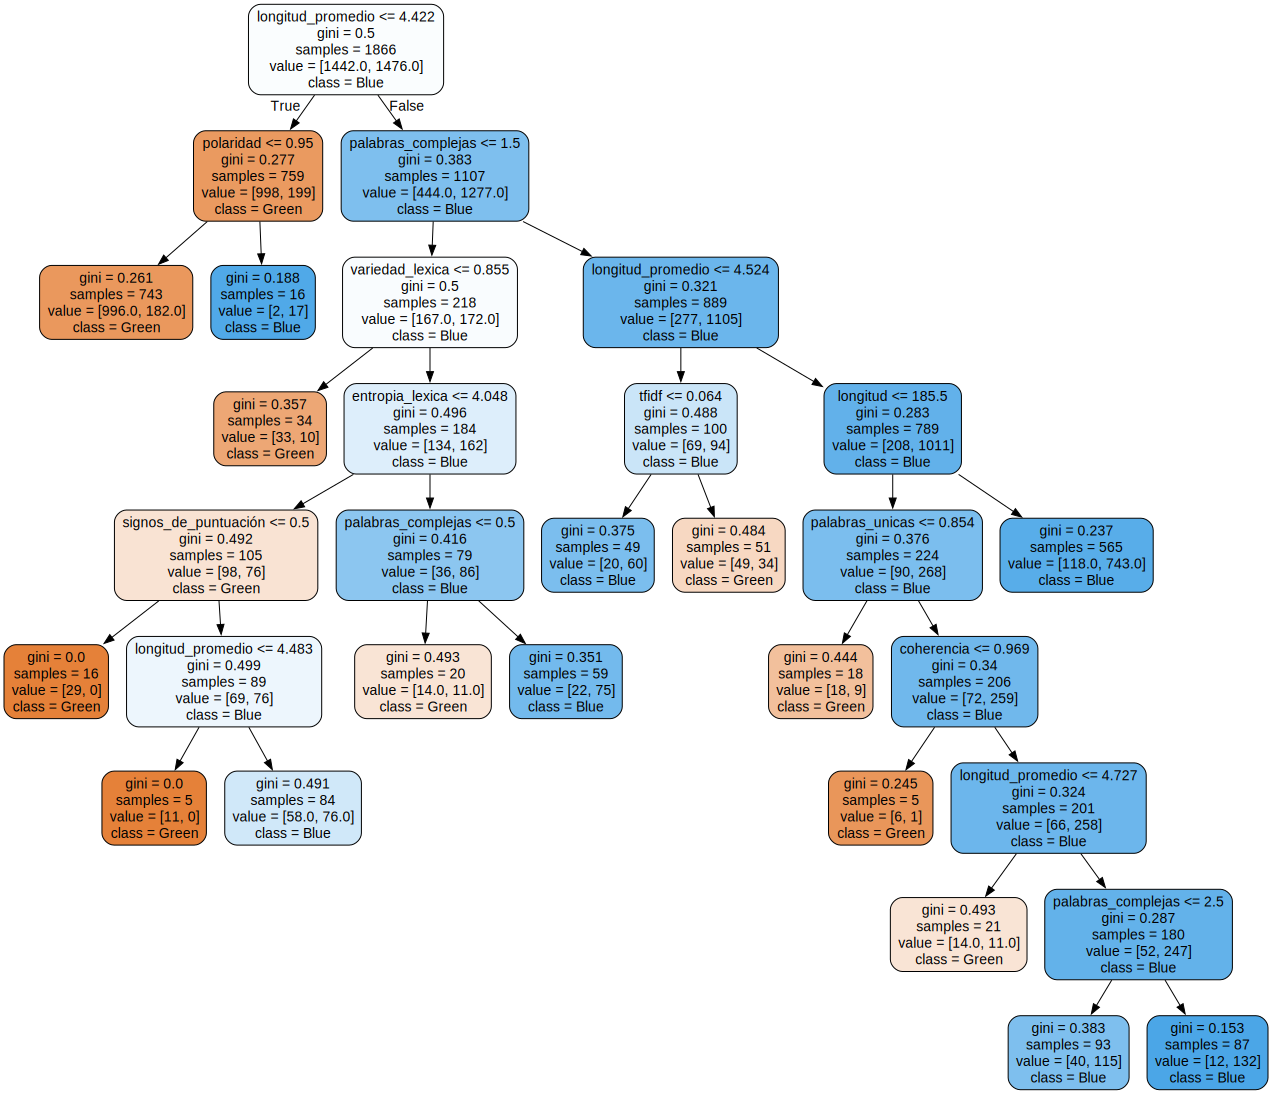

In [73]:
Source.from_file(str(IMAGES_PATH/"example_tree.dot"))

In [75]:
def obtener_bosque(X, y, max_depth=15, n_estimators=100, max_leaf_nodes=16, max_features='log2', min_samples_leaf=4, min_samples_split=10): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    rnd_clf = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, max_features=max_features, 
                                  min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split,
                                  random_state=42, max_depth=max_depth)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    roc_auc = roc_auc_score(y_test, y_pred_rf)
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    classification_rep = classification_report(y_test, y_pred_rf)

    # Imprimir resultados
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    return rnd_clf